In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings


In [3]:
df=pd.read_csv("economy.csv")
df.head(100)

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953"
1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953"
2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956"
3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955"
4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955"
...,...,...,...,...,...,...,...,...,...,...,...
95,11-02-2022,Vistara,UK,737,15:55,Delhi,07h 35m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:30,Mumbai,"17,610"
96,11-02-2022,Air India,AI,762,20:15,Delhi,23h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:05,Mumbai,"17,295"
97,11-02-2022,Vistara,UK,673,13:20,Delhi,05h 00m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,18:20,Mumbai,"17,663"
98,11-02-2022,Air India,AI,839,21:25,Delhi,26h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"18,030"


In [4]:
df.isnull().sum()

date          0
airline       0
ch_code       0
num_code      0
dep_time      0
from          0
time_taken    0
stop          0
arr_time      0
to            0
price         0
dtype: int64

In [5]:


df.shape

(206774, 11)

In [6]:
df = df.drop(['date','dep_time','time_taken','stop','arr_time'], axis=1)

In [7]:
df["price"] = pd.to_numeric(df["price"].replace({',':''}, regex=True))

In [8]:
df["price"] = pd.to_numeric(df['price'])
df

,airline,ch_code,num_code,from,to,price
0,SpiceJet,SG,8709,Delhi,Mumbai,5953
1,SpiceJet,SG,8157,Delhi,Mumbai,5953
2,AirAsia,I5,764,Delhi,Mumbai,5956
3,Vistara,UK,995,Delhi,Mumbai,5955
4,Vistara,UK,963,Delhi,Mumbai,5955
...,...,...,...,...,...,...
206769,Vistara,UK,832,Chennai,Hyderabad,7697
206770,Vistara,UK,832,Chennai,Hyderabad,7709
206771,Vistara,UK,826,Chennai,Hyderabad,8640
206772,Vistara,UK,822,Chennai,Hyderabad,8640


In [9]:
df

,airline,ch_code,num_code,from,to,price
0,SpiceJet,SG,8709,Delhi,Mumbai,5953
1,SpiceJet,SG,8157,Delhi,Mumbai,5953
2,AirAsia,I5,764,Delhi,Mumbai,5956
3,Vistara,UK,995,Delhi,Mumbai,5955
4,Vistara,UK,963,Delhi,Mumbai,5955
...,...,...,...,...,...,...
206769,Vistara,UK,832,Chennai,Hyderabad,7697
206770,Vistara,UK,832,Chennai,Hyderabad,7709
206771,Vistara,UK,826,Chennai,Hyderabad,8640
206772,Vistara,UK,822,Chennai,Hyderabad,8640


In [10]:
df.dtypes

airline     object
ch_code     object
num_code     int64
from        object
to          object
price        int64
dtype: object

In [11]:
df


,airline,ch_code,num_code,from,to,price
0,SpiceJet,SG,8709,Delhi,Mumbai,5953
1,SpiceJet,SG,8157,Delhi,Mumbai,5953
2,AirAsia,I5,764,Delhi,Mumbai,5956
3,Vistara,UK,995,Delhi,Mumbai,5955
4,Vistara,UK,963,Delhi,Mumbai,5955
...,...,...,...,...,...,...
206769,Vistara,UK,832,Chennai,Hyderabad,7697
206770,Vistara,UK,832,Chennai,Hyderabad,7709
206771,Vistara,UK,826,Chennai,Hyderabad,8640
206772,Vistara,UK,822,Chennai,Hyderabad,8640


In [12]:
df

,airline,ch_code,num_code,from,to,price
0,SpiceJet,SG,8709,Delhi,Mumbai,5953
1,SpiceJet,SG,8157,Delhi,Mumbai,5953
2,AirAsia,I5,764,Delhi,Mumbai,5956
3,Vistara,UK,995,Delhi,Mumbai,5955
4,Vistara,UK,963,Delhi,Mumbai,5955
...,...,...,...,...,...,...
206769,Vistara,UK,832,Chennai,Hyderabad,7697
206770,Vistara,UK,832,Chennai,Hyderabad,7709
206771,Vistara,UK,826,Chennai,Hyderabad,8640
206772,Vistara,UK,822,Chennai,Hyderabad,8640


In [13]:
df['airline'].value_counts()

airline
Vistara      67270
Air India    47996
Indigo       43120
GO FIRST     23177
AirAsia      16098
SpiceJet      9011
StarAir         61
Trujet          41
Name: count, dtype: int64

In [14]:
from sklearn import preprocessing
  
# label_encoder object knows 
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df['airline']= label_encoder.fit_transform(df['airline'])
  
df['airline'].unique()

array([4, 1, 7, 2, 3, 0, 6, 5])

In [15]:
df['ch_code'].value_counts()

ch_code
UK    67270
AI    47996
6E    43120
G8    23177
I5    16098
SG     9011
S5       61
2T       41
Name: count, dtype: int64

In [16]:
from sklearn import preprocessing
  
# label_encoder object knows 
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df['ch_code']= label_encoder.fit_transform(df['ch_code'])
  
df['ch_code'].unique()

array([6, 4, 7, 3, 1, 2, 0, 5])

In [17]:
df['from'].value_counts()

from
Delhi        43029
Mumbai       41045
Bangalore    35665
Kolkata      32874
Hyderabad    27990
Chennai      26171
Name: count, dtype: int64

In [18]:
from sklearn import preprocessing
  
# label_encoder object knows 
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df['from']= label_encoder.fit_transform(df['from'])
  
df['from'].unique()

array([2, 5, 0, 4, 3, 1])

In [19]:
df['to'].value_counts()

to
Delhi        40654
Mumbai       40118
Bangalore    34914
Kolkata      34777
Hyderabad    29101
Chennai      27210
Name: count, dtype: int64

In [20]:
from sklearn import preprocessing
  
# label_encoder object knows 
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df['to']= label_encoder.fit_transform(df['to'])
  
df['to'].unique()

array([5, 0, 4, 3, 1, 2])

In [21]:
df

,airline,ch_code,num_code,from,to,price
0,4,6,8709,2,5,5953
1,4,6,8157,2,5,5953
2,1,4,764,2,5,5956
3,7,7,995,2,5,5955
4,7,7,963,2,5,5955
...,...,...,...,...,...,...
206769,7,7,832,1,3,7697
206770,7,7,832,1,3,7709
206771,7,7,826,1,3,8640
206772,7,7,822,1,3,8640


<Axes: >

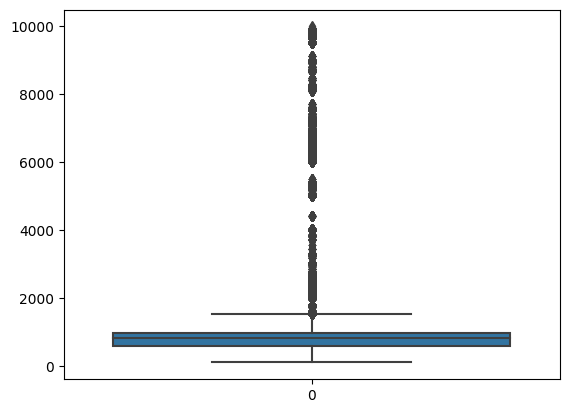

In [22]:
sns.boxplot(df['num_code'])

<Axes: >

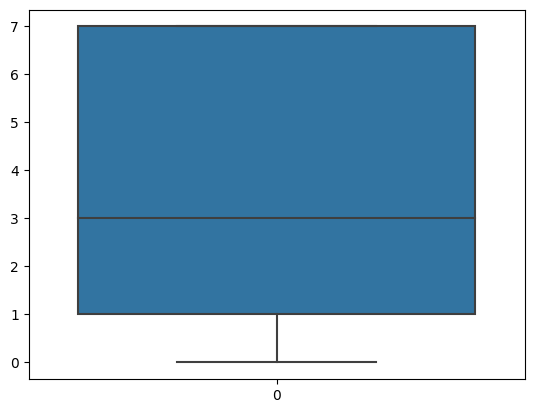

In [23]:
sns.boxplot(df['airline'])

<Axes: >

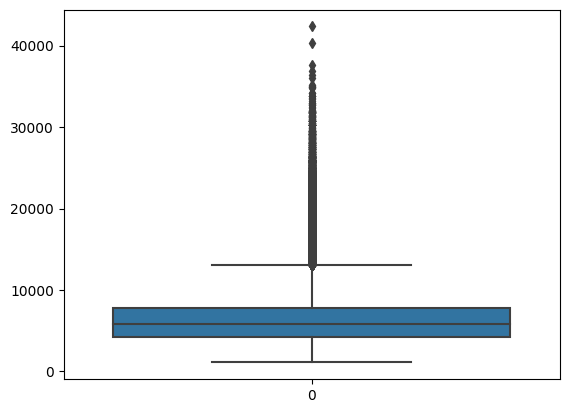

In [24]:
sns.boxplot(df['price'])

<Axes: >

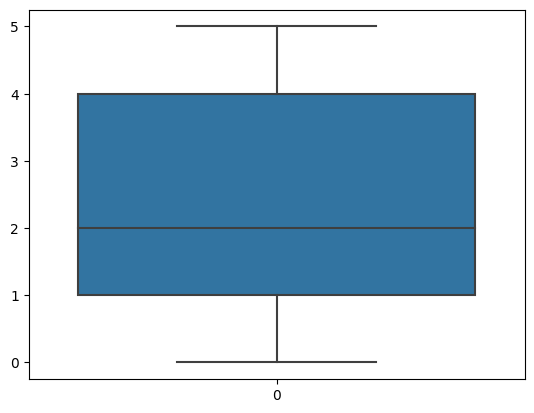

In [25]:
sns.boxplot(df['from'])

<Axes: >

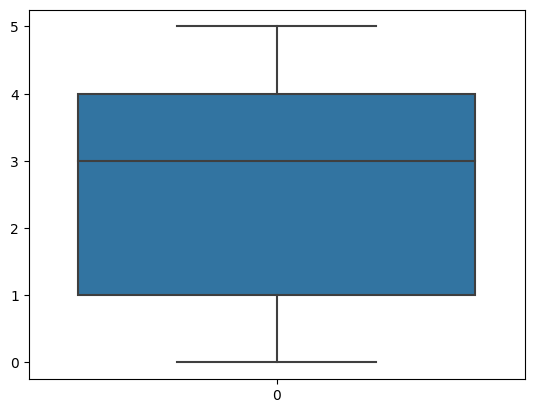

In [26]:
sns.boxplot(df['to'])

In [27]:
#univariate analysis

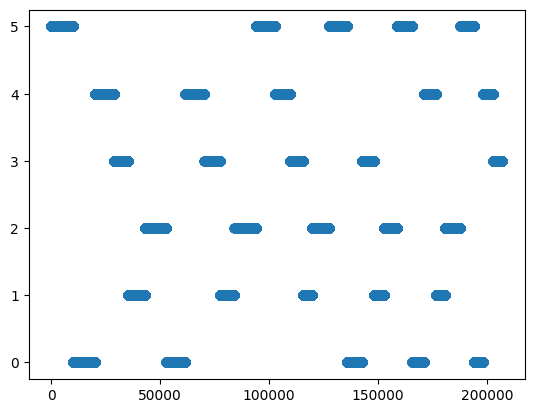

In [28]:
plt.scatter(df.index,df['to'])

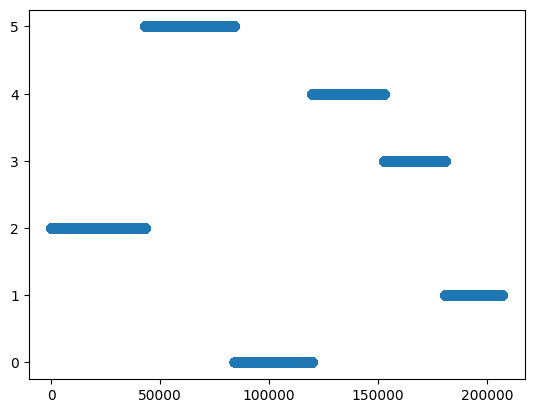

In [29]:
plt.scatter(df.index,df['from'])

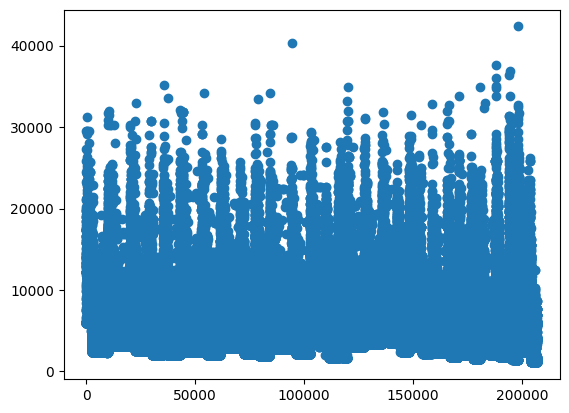

In [30]:
plt.scatter(df.index,df['price'])

<Axes: >

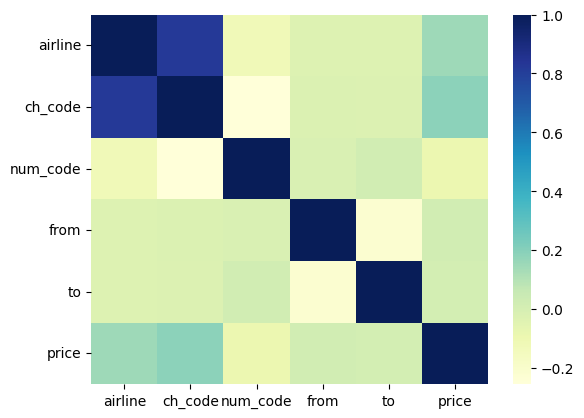

In [31]:
sns.heatmap(df.corr(),cmap="YlGnBu")

In [34]:
# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to your data
scaler.fit(df)

# Perform standardization on the DataFrame
df_standardized = scaler.transform(df)
# Convert the standardized array back to a DataFrame
df_standardized = pd.DataFrame(df_standardized, columns=df.columns)
df_standardized

,airline,ch_code,num_code,from,to,price
0,0.223922,0.873085,3.017897,-0.331052,1.387169,-0.165140
1,0.223922,0.873085,2.780013,-0.331052,1.387169,-0.165140
2,-0.862969,0.056844,-0.405996,-0.331052,1.387169,-0.164339
3,1.310812,1.281206,-0.306447,-0.331052,1.387169,-0.164606
4,1.310812,1.281206,-0.320237,-0.331052,1.387169,-0.164606
...,...,...,...,...,...,...
206769,1.310812,1.281206,-0.376691,-0.904493,0.236051,0.300742
206770,1.310812,1.281206,-0.376691,-0.904493,0.236051,0.303948
206771,1.310812,1.281206,-0.379277,-0.904493,0.236051,0.552650
206772,1.310812,1.281206,-0.381001,-0.904493,0.236051,0.552650


In [35]:
#Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the scaler to your data
scaler.fit(df)

# Perform normalization on the DataFrame
df_normalized = scaler.transform(df)

# Convert the normalized array back to a DataFrame
df_normalized = pd.DataFrame(df_normalized, columns=df.columns)

# Print the normalized DataFrame
df_normalized

,airline,ch_code,num_code,from,to,price
0,0.571429,0.857143,0.870374,0.4,1.0,0.117544
1,0.571429,0.857143,0.814560,0.4,1.0,0.117544
2,0.142857,0.571429,0.067037,0.4,1.0,0.117617
3,1.000000,1.000000,0.090394,0.4,1.0,0.117593
4,1.000000,1.000000,0.087159,0.4,1.0,0.117593
...,...,...,...,...,...,...
206769,1.000000,1.000000,0.073913,0.2,0.6,0.159829
206770,1.000000,1.000000,0.073913,0.2,0.6,0.160120
206771,1.000000,1.000000,0.073306,0.2,0.6,0.182693
206772,1.000000,1.000000,0.072902,0.2,0.6,0.182693


In [36]:
x=df_standardized.drop(['price'],axis=1)

In [37]:
x

,airline,ch_code,num_code,from,to
0,0.223922,0.873085,3.017897,-0.331052,1.387169
1,0.223922,0.873085,2.780013,-0.331052,1.387169
2,-0.862969,0.056844,-0.405996,-0.331052,1.387169
3,1.310812,1.281206,-0.306447,-0.331052,1.387169
4,1.310812,1.281206,-0.320237,-0.331052,1.387169
...,...,...,...,...,...
206769,1.310812,1.281206,-0.376691,-0.904493,0.236051
206770,1.310812,1.281206,-0.376691,-0.904493,0.236051
206771,1.310812,1.281206,-0.379277,-0.904493,0.236051
206772,1.310812,1.281206,-0.381001,-0.904493,0.236051


In [38]:
y=df['price']

In [39]:
y

0         5953
1         5953
2         5956
3         5955
4         5955
          ... 
206769    7697
206770    7709
206771    8640
206772    8640
206773    8640
Name: price, Length: 206774, dtype: int64

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20, random_state=0)
       

In [41]:
x_train

,airline,ch_code,num_code,from,to
192717,-0.138375,-1.167518,-0.668013,-0.904493,1.387169
63732,1.310812,1.281206,-0.471069,1.389273,0.811610
172037,1.310812,1.281206,-0.351696,0.242390,0.811610
70539,1.310812,1.281206,-0.330149,1.389273,0.236051
82458,1.310812,1.281206,-0.306878,1.389273,-0.915067
...,...,...,...,...,...
176963,-1.225266,-0.759397,-0.501236,0.242390,-0.915067
117952,-0.862969,0.056844,-0.075889,-1.477934,-0.915067
173685,-0.138375,-1.167518,-0.328425,0.242390,0.811610
43567,-1.225266,-0.759397,-0.361608,1.389273,-0.339508


In [42]:
x_test

,airline,ch_code,num_code,from,to
195712,-0.862969,0.056844,-0.075458,-0.904493,-1.490626
57316,1.310812,1.281206,-0.362470,1.389273,-1.490626
137222,-0.138375,-1.167518,1.859505,0.815831,-1.490626
73857,1.310812,1.281206,-0.334458,1.389273,0.236051
66737,0.223922,0.873085,-0.539159,1.389273,0.811610
...,...,...,...,...,...
89750,-1.225266,-0.759397,-0.412891,-1.477934,-0.339508
4094,-1.225266,-0.759397,-0.373675,-0.331052,1.387169
31684,1.310812,1.281206,-0.335751,-0.331052,0.236051
45579,-1.225266,-0.759397,-0.445212,1.389273,-0.339508


In [43]:
y_train

192717     1830
63732     13292
172037    11319
70539      9879
82458      4348
          ...  
176963    13339
117952     1603
173685     4330
43567      5943
199340    14014
Name: price, Length: 165419, dtype: int64

In [44]:
y_test

195712    1548
57316     2074
137222    6977
73857     4784
66737     6196
          ... 
89750     5906
4094      3831
31684     5772
45579     6650
32420     5530
Name: price, Length: 41355, dtype: int64

In [45]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [46]:
model = LinearRegression()

In [47]:
model.fit(x, y)

LinearRegression()

In [48]:
model = LinearRegression().fit(x_train, y_train)

In [49]:
r_sq = model.score(x_train, y_train)
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.037383430830632


In [50]:
y_pred = model.predict(x_train)
print(f"predicted response:\n{y_pred}")

predicted response:
[5978.03099526 7700.12216346 7577.59070512 ... 5972.08404541 6220.77995755
 7479.08088043]


In [51]:
coffe_df=pd.DataFrame(model.coef_,x.columns,columns=['Coefficent'])

In [52]:
coffe_df

,Coefficent
airline,17.973011
ch_code,643.413409
num_code,-168.402401
from,89.310579
to,88.936600


In [53]:

intercept = pd.DataFrame(model.intercept_,x.columns,columns=['intrecept'])
intercept

,intrecept
airline,6576.630218
ch_code,6576.630218
num_code,6576.630218
from,6576.630218
to,6576.630218


In [54]:
df_multiplied = coffe_df * intercept
df_multiplied

,Coefficent,intrecept
airline,NaN,NaN
ch_code,NaN,NaN
num_code,NaN,NaN
from,NaN,NaN
to,NaN,NaN


In [57]:
#y=mx+c
import pandas as pd

# Assuming coffe_df and x_train are your DataFrames
df3 = coffe_df.multiply(x_test)

df3


,Coefficent,airline,ch_code,from,num_code,to
0,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN
12,NaN,NaN,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,NaN,NaN
17,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
airline,NaN,NaN,NaN,NaN,NaN,NaN
ch_code,NaN,NaN,NaN,NaN,NaN,NaN
from,NaN,NaN,NaN,NaN,NaN,NaN
num_code,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
prediction=model.predict(x_test)
prediction

array([6397.04955808, 7477.08075923, 5450.0927251 , ..., 7472.50286881,
       6234.85910234, 6144.81418496])

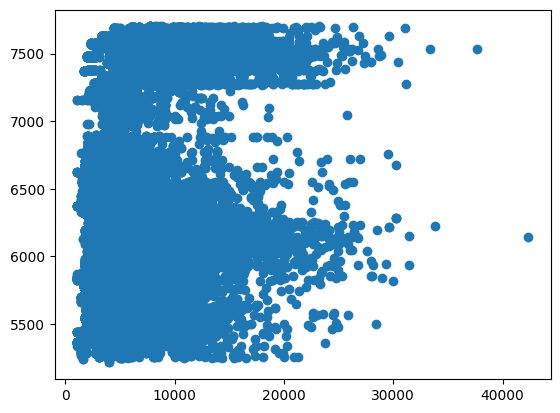

In [59]:
plt.scatter(y_test,prediction)

<Axes: xlabel='price', ylabel='Density'>

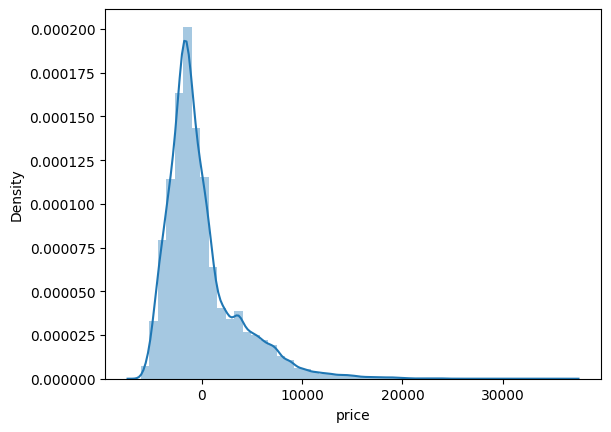

In [66]:
import warnings
warnings.simplefilter("ignore")
sns.distplot((y_test-prediction),bins=50)

<Axes: xlabel='price', ylabel='Count'>

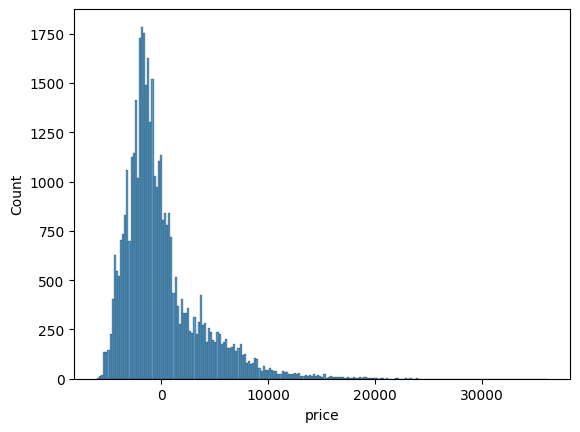

In [61]:
sns.histplot(y_test-prediction)

In [62]:
from sklearn.metrics import mean_squared_error

# Assuming y_true and y_pred are the actual and predicted values, respectively
mse = mean_squared_error(y_test,y_pred)
print("MSE:", mse)


ValueError: Found input variables with inconsistent numbers of samples: [41355, 165419]

In [67]:
from sklearn.metrics import r2_score

# Assuming y_true and y_pred are the actual and predicted values, respectively
r_squared = r2_score(y_test, y_pred)
print("R-squared:", r_squared)


ValueError: Found input variables with inconsistent numbers of samples: [41355, 165419]

In [63]:
df

,airline,ch_code,num_code,from,to,price
0,4,6,8709,2,5,5953
1,4,6,8157,2,5,5953
2,1,4,764,2,5,5956
3,7,7,995,2,5,5955
4,7,7,963,2,5,5955
...,...,...,...,...,...,...
206769,7,7,832,1,3,7697
206770,7,7,832,1,3,7709
206771,7,7,826,1,3,8640
206772,7,7,822,1,3,8640


Text(0, 0.5, 'Pred')

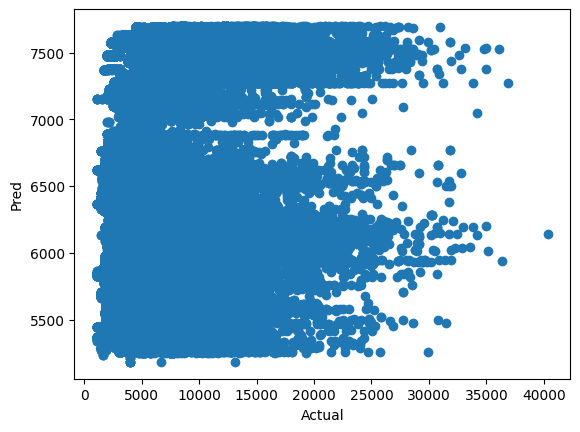

In [64]:
plt.scatter(y_train,y_pred )
plt.xlabel('Actual')
plt.ylabel('Pred')